In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
total_women = 1000
#пропорция больных
cancer_prevalence = 0.013
#способность правильно определять больных
sensitivity = 0.85         
#способность правильно определять здоровых
specificity = 0.90

In [21]:
def calculate_test_results(total, prevalence, sensitivity, specificity):
    has_cancer = int(total*prevalence)
    healthy = total-has_cancer
    #результаты для больных
    true_positive = int(sensitivity*has_cancer)
    false_negative = has_cancer-true_positive
    #результаты для здоровых
    true_negative = int(healthy*specificity)
    #false_positive = int(total_women*(1-specificity))
    false_positive = healthy - true_negative
    return {
        'has_cancer': has_cancer,
        'healthy': healthy,
        'true_positive': true_positive,
        'false_negative': false_negative,
        'true_negative': true_negative,
        'false_positive': false_positive
    }



In [24]:
results = calculate_test_results(total_women, cancer_prevalence, sensitivity,specificity)

In [25]:
# Создание DataFrame для визуализации
df = pd.DataFrame({
    'Category': ['True Positive', 'False Negative', 'True Negative', 'False Positive'],
    'Count': [
        results['true_positive'],
        results['false_negative'],
        results['true_negative'],
        results['false_positive']
    ],
    'Status': ['Больные', 'Больные', 'Здоровые', 'Здоровые'],
    'Test_Result': ['Положительный', 'Отрицательный', 'Отрицательный', 'Положительный']
})


In [26]:
df

,Category,Count,Status,Test_Result
0,True Positive,11,Больные,Положительный
1,False Negative,2,Больные,Отрицательный
2,True Negative,888,Здоровые,Отрицательный
3,False Positive,99,Здоровые,Положительный


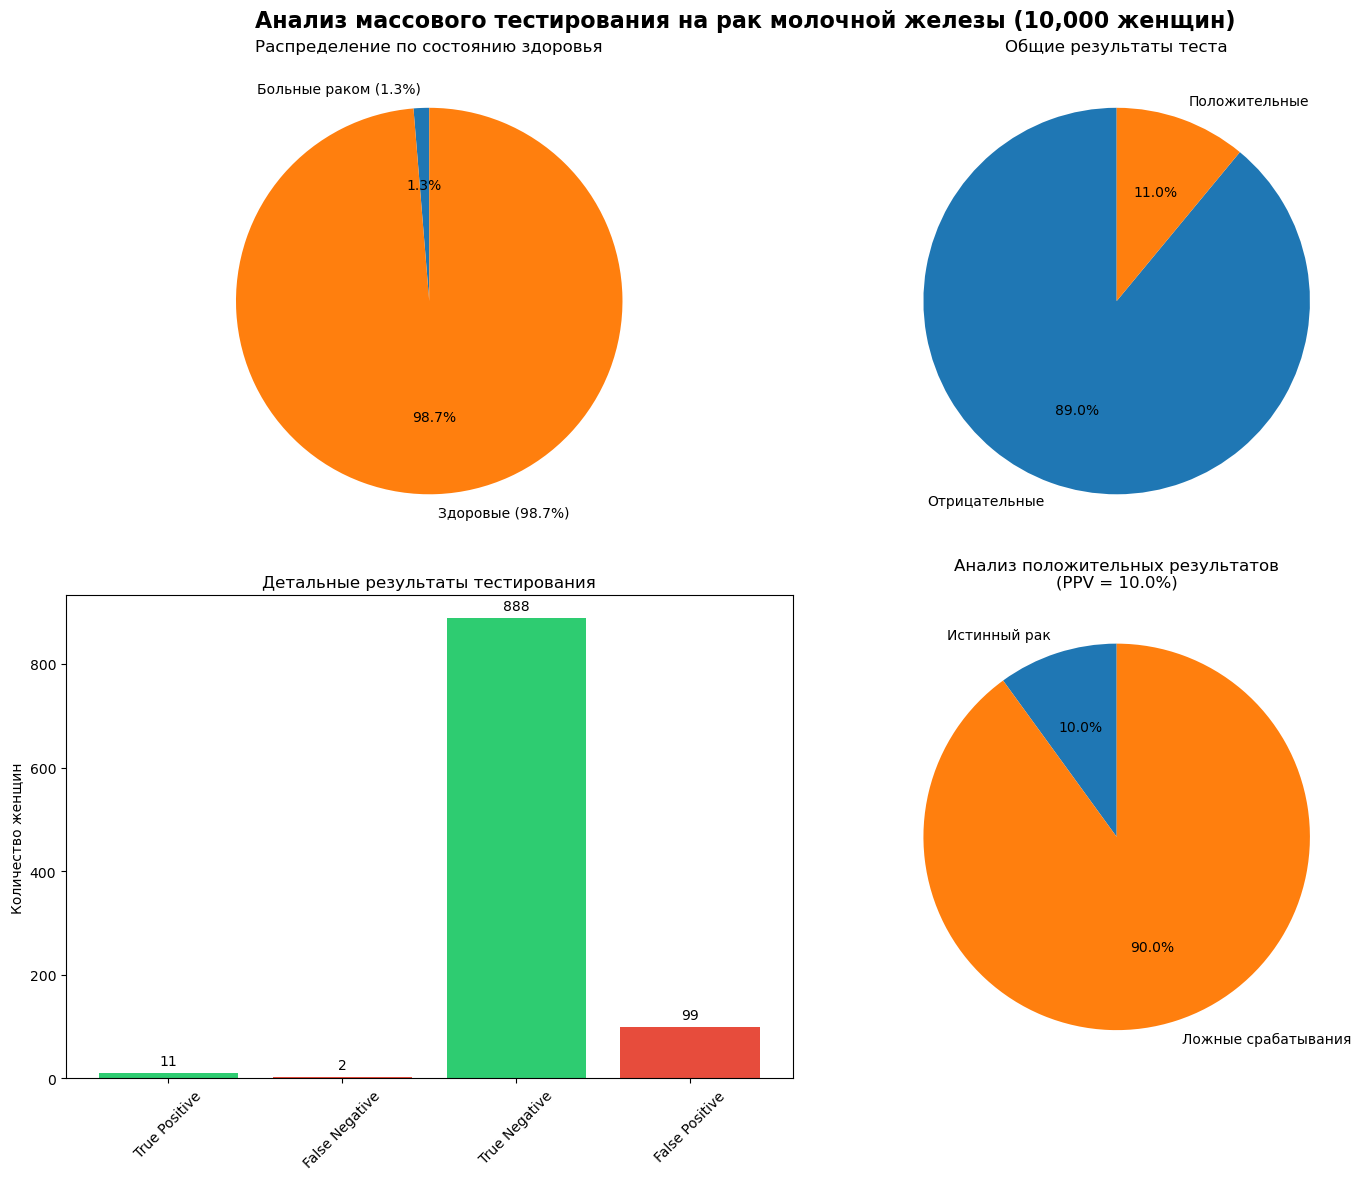

АНАЛИЗ МАССОВОГО ТЕСТИРОВАНИЯ НА РАК МОЛОЧНОЙ ЖЕЛЕЗЫ
Всего женщин: 1,000
Реальная распространенность: 1.3%
Чувствительность теста: 85%
Специфичность теста: 90%

РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:
Истинно положительные (рак обнаружен): 11
Ложно отрицательные (рак пропущен): 2
Истинно отрицательные (здоровы): 888
Ложно положительные (ложная тревога): 99

КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:
Positive Predictive Value (PPV): 10.0%
→ Только 10.0% положительных результатов - настоящий рак
→ Каждый истинный случай рака сопровождается 9.0 ложными срабатываниями
→ 9.9% всех женщин получат ложный положительный результат


In [27]:
# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Анализ массового тестирования на рак молочной железы (10,000 женщин)', 
             fontsize=16, fontweight='bold')

# 1. Общее распределение
status_counts = [results['has_cancer'], results['healthy']]
ax1.pie(status_counts, labels=['Больные раком (1.3%)', 'Здоровые (98.7%)'], 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Распределение по состоянию здоровья')

# 2. Результаты тестирования
test_results = df.groupby('Test_Result')['Count'].sum()
ax2.pie(test_results, labels=['Отрицательные', 'Положительные'], 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Общие результаты теста')

# 3. Детальные результаты (столбчатая диаграмма)
colors = ['#2ecc71', '#e74c3c', '#2ecc71', '#e74c3c']  # Зеленый = правильный, Красный = ошибка
bars = ax3.bar(df['Category'], df['Count'], color=colors)
ax3.set_title('Детальные результаты тестирования')
ax3.set_ylabel('Количество женщин')
ax3.tick_params(axis='x', rotation=45)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height}', ha='center', va='bottom')

# 4. Анализ положительных результатов
positive_cases = results['true_positive'] + results['false_positive']
ppv = results['true_positive'] / positive_cases * 100  # Positive Predictive Value

positive_df = pd.DataFrame({
    'Type': ['Истинный рак', 'Ложные срабатывания'],
    'Count': [results['true_positive'], results['false_positive']],
    'Percentage': [results['true_positive']/positive_cases*100, 
                   results['false_positive']/positive_cases*100]
})

ax4.pie(positive_df['Count'], labels=positive_df['Type'], 
        autopct='%1.1f%%', startangle=90)
ax4.set_title(f'Анализ положительных результатов\n(PPV = {ppv:.1f}%)')

plt.tight_layout()
plt.show()

# Текстовая информация
print("="*60)
print("АНАЛИЗ МАССОВОГО ТЕСТИРОВАНИЯ НА РАК МОЛОЧНОЙ ЖЕЛЕЗЫ")
print("="*60)
print(f"Всего женщин: {total_women:,}")
print(f"Реальная распространенность: {cancer_prevalence*100:.1f}%")
print(f"Чувствительность теста: {sensitivity*100:.0f}%")
print(f"Специфичность теста: {specificity*100:.0f}%")
print("\n" + "="*40)
print("РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:")
print("="*40)
print(f"Истинно положительные (рак обнаружен): {results['true_positive']:,}")
print(f"Ложно отрицательные (рак пропущен): {results['false_negative']:,}")
print(f"Истинно отрицательные (здоровы): {results['true_negative']:,}")
print(f"Ложно положительные (ложная тревога): {results['false_positive']:,}")
print("\n" + "="*40)
print("КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:")
print("="*40)
print(f"Positive Predictive Value (PPV): {ppv:.1f}%")
print(f"→ Только {ppv:.1f}% положительных результатов - настоящий рак")
print(f"→ Каждый истинный случай рака сопровождается {results['false_positive']/results['true_positive']:.1f} ложными срабатываниями")
print(f"→ {results['false_positive']/total_women*100:.1f}% всех женщин получат ложный положительный результат")